In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../src")

In [3]:
import numpy as np
import pydot
import pydrake
from pydrake.all import (
    DiagramBuilder,
    MultibodyPlant,
    Parser,
    Propeller,
    PropellerInfo,
    RigidTransform,
    StartMeshcat,
    MeshcatVisualizer,
    SceneGraph,
    Simulator,
    AddMultibodyPlantSceneGraph,
    LeafSystem,
    LeafSystem_,
    ExternallyAppliedSpatialForce,
    ExternallyAppliedSpatialForce_,
    TemplateSystem,
    AbstractValue,
    SpatialForce,
    SpatialForce_,
    SpatialInertia,
    UnitInertia,
    CollisionFilterDeclaration,
    GeometrySet,
    Sphere
)
from pydrake.examples import (
    QuadrotorGeometry
)
from IPython.display import display, SVG, Image

from underactuated.scenarios import AddFloatingRpyJoint

In [4]:
# Start the visualizer (run this cell only once, each instance consumes a port)
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7001


In [5]:
from world import make_n_quadrotor_system

In [6]:
diagram, plant = make_n_quadrotor_system(meshcat, 3)

True


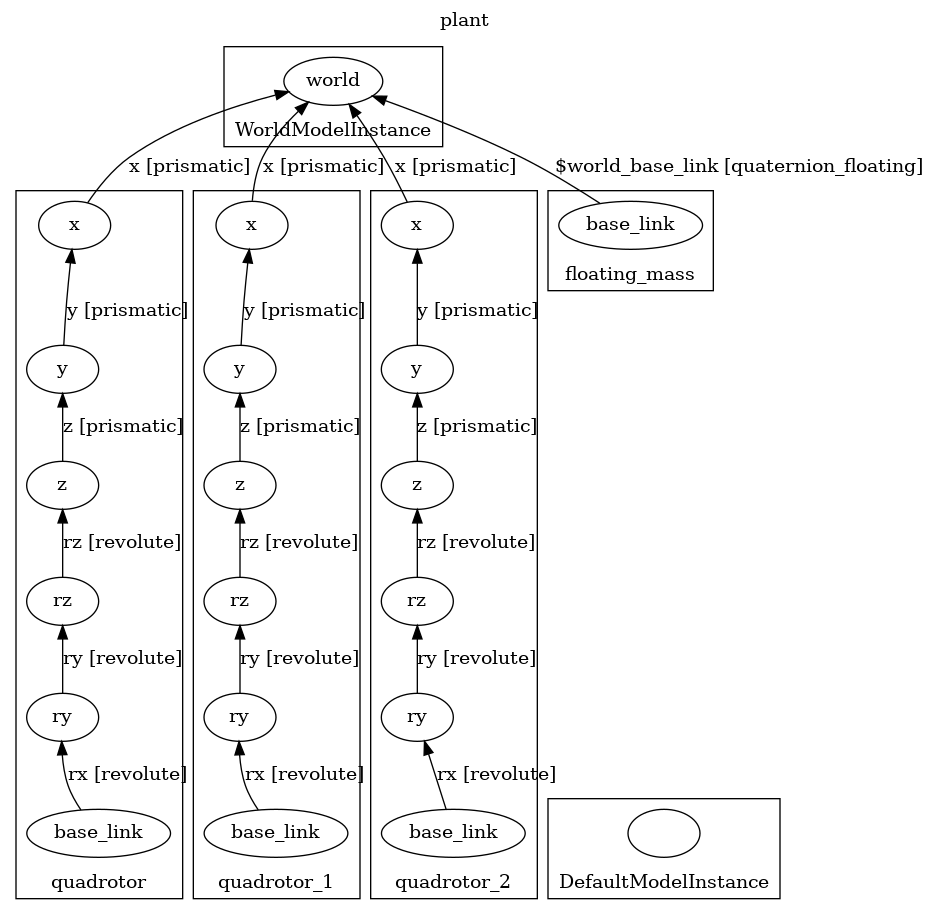

In [7]:
display(
    Image(
        pydot.graph_from_dot_data(plant.GetTopologyGraphvizString())[0].create_png()
    )
)

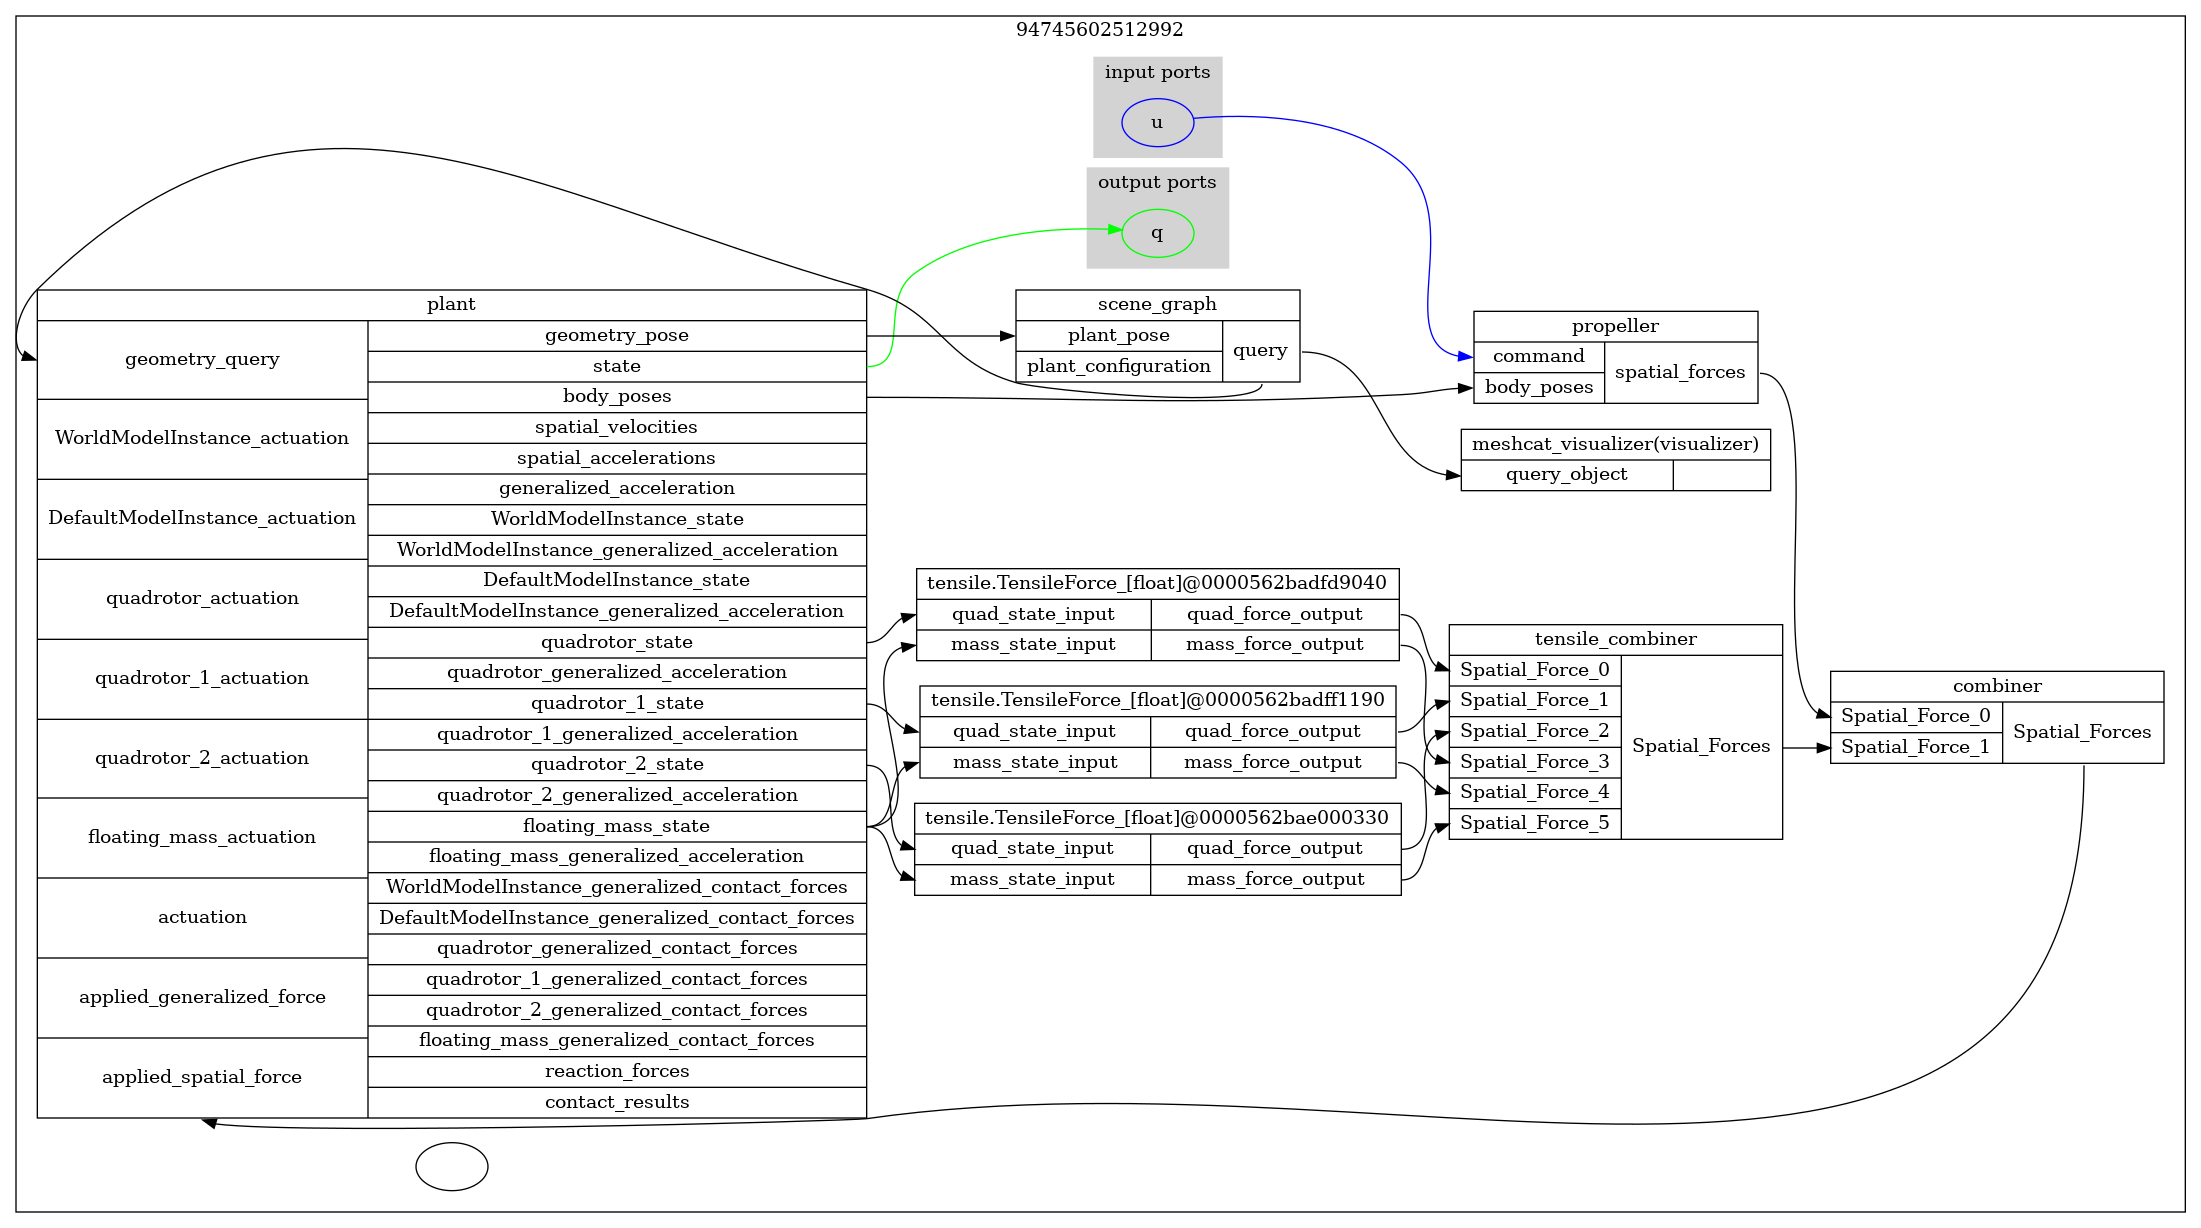

In [8]:
display(
    Image(
        pydot.graph_from_dot_data(diagram.GetGraphvizString())[
            0
        ].create_png()
    )
)

In [9]:
from util import CreateNullExternalForce, DisableCollisionChecking

In [ ]:
simulator = Simulator(diagram)
simulator.set_target_realtime_rate(1)
context = simulator.get_mutable_context()

u = diagram.GetInputPort("u")
u.FixValue(context, np.zeros(u.size()))

sg = diagram.GetSubsystemByName("scene_graph")
DisableCollisionChecking(sg, context)

# CreateNullExternalForce(diagram.GetSubsystemByName("plant"))

# combiner_system = diagram.GetSubsystemByName("combiner")
# combiner_empty_port = combiner_system.Input_ports[1]
# combiner_empty_port.FixValue(combiner_system.GetMyContextFromRoot(context), [CreateNullExternalForce(plant)])

simulator.set_target_realtime_rate(0.1)
# Simulate
while True:
    context.SetTime(0.0)
    context.SetContinuousState(
        0.5
        * np.random.randn(
            context.num_continuous_states(),
        )
    )
    simulator.Initialize()
    simulator.AdvanceTo(1)



In [ ]:
simulator = Simulator(diagram)
simulator.set_target_realtime_rate(1)
context = simulator.get_mutable_context()

u = diagram.GetInputPort("u")
u.FixValue(context, np.zeros(u.size()))

sg = diagram.GetSubsystemByName("scene_graph")
DisableCollisionChecking(sg)


context.SetTime(0.0)
# context.SetContinuousState(
#         0.25
#         * np.random.randn(
#             context.num_continuous_states(),
#         )
#     )
simulator.Initialize()
simulator.AdvanceTo(30)
